In [1]:
##Importing all the required libraries

import numpy as np
import pandas as pd 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
##Reading the CSV files

df_mon = pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df_tue = pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df_wed = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
df_thur_mor = pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df_thur_after = pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df_fri_mor = pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df_fri_after1 = pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df_fri_after2 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [3]:
df = pd.DataFrame()

In [4]:
##Merging all the dataframes into one

df = df.append(df_mon)
df = df.append(df_tue)
df = df.append(df_wed)
df = df.append(df_thur_mor)
df = df.append(df_thur_after)
df = df.append(df_fri_mor)
df = df.append(df_fri_after1)
df = df.append(df_fri_after2)

In [5]:
##Resetting Indices
df.reset_index(drop=True,inplace=True)

In [6]:
##Dropping NaN values
df.dropna(inplace=True)

In [7]:
df.shape

(2829385, 79)

In [8]:
df.columns = df.columns.str.strip()

In [9]:
##Dropping values with infinity
df.drop(df[df["Flow Bytes/s"] == np.inf].index, inplace=True)

In [10]:
df.shape

(2827876, 79)

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df["Label"].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [13]:
##Factorizing the labels inorder to calculate the feature importance.
df['Label'] = pd.factorize(df['Label'])[0]

In [14]:
df["Label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [15]:
X = df.iloc[:,:-1] 
Y = df.iloc[:,-1]

## Feature Selection

In [16]:
##Calculating the importance score of all the features

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

[4.79914625e-02 1.49910125e-02 1.25177896e-02 7.10170246e-03
 6.86606730e-03 4.02360378e-03 9.95294973e-03 1.15612186e-02
 9.54783861e-03 9.62721184e-03 2.83991597e-02 2.60074577e-02
 4.08183306e-02 2.54480220e-02 2.98693466e-03 9.98311433e-03
 6.93904152e-03 1.19256597e-02 2.30263588e-02 5.61023527e-03
 1.56329308e-02 1.34992472e-02 3.02754889e-02 2.40037750e-02
 5.78087060e-03 7.19922538e-03 4.34660208e-03 4.34822406e-03
 5.17205816e-03 2.72436675e-03 4.28486576e-03 0.00000000e+00
 8.75906154e-06 0.00000000e+00 1.38407524e-02 7.91184558e-03
 1.88114482e-02 5.70252443e-03 1.77977423e-02 1.88166587e-02
 2.95354300e-02 2.96893220e-02 2.60954131e-02 8.78259399e-03
 5.52240120e-03 1.06243546e-06 5.58605922e-02 3.02803772e-02
 9.59803297e-03 1.15700455e-05 3.84984982e-07 1.17732540e-02
 3.09457994e-02 1.14208849e-02 3.58001898e-02 1.01380161e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.40884136e-03 7.09582117e-03
 5.28423757e-03 8.651022

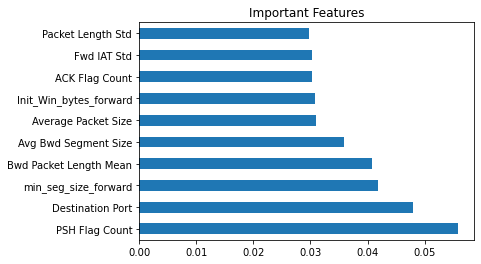

In [17]:
##Plotting top 10 features

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Important Features")
plt.show()

In [18]:
feature_imp = model.feature_importances_

In [19]:
feature_imp

array([4.79914625e-02, 1.49910125e-02, 1.25177896e-02, 7.10170246e-03,
       6.86606730e-03, 4.02360378e-03, 9.95294973e-03, 1.15612186e-02,
       9.54783861e-03, 9.62721184e-03, 2.83991597e-02, 2.60074577e-02,
       4.08183306e-02, 2.54480220e-02, 2.98693466e-03, 9.98311433e-03,
       6.93904152e-03, 1.19256597e-02, 2.30263588e-02, 5.61023527e-03,
       1.56329308e-02, 1.34992472e-02, 3.02754889e-02, 2.40037750e-02,
       5.78087060e-03, 7.19922538e-03, 4.34660208e-03, 4.34822406e-03,
       5.17205816e-03, 2.72436675e-03, 4.28486576e-03, 0.00000000e+00,
       8.75906154e-06, 0.00000000e+00, 1.38407524e-02, 7.91184558e-03,
       1.88114482e-02, 5.70252443e-03, 1.77977423e-02, 1.88166587e-02,
       2.95354300e-02, 2.96893220e-02, 2.60954131e-02, 8.78259399e-03,
       5.52240120e-03, 1.06243546e-06, 5.58605922e-02, 3.02803772e-02,
       9.59803297e-03, 1.15700455e-05, 3.84984982e-07, 1.17732540e-02,
       3.09457994e-02, 1.14208849e-02, 3.58001898e-02, 1.01380161e-02,
      

In [20]:
feature_imp_lst = []
for i in range(len(feature_imp)):
    feature_imp_lst.append((df.columns[i],feature_imp[i]))

In [21]:
feature_imp_lst.sort(key=lambda x:x[1],reverse=True)

In [22]:
feature_imp_lst   ##Printing features names along with their scores

[('PSH Flag Count', 0.05586059216989661),
 ('Destination Port', 0.047991462528883526),
 ('min_seg_size_forward', 0.041797705178049316),
 ('Bwd Packet Length Mean', 0.04081833056375885),
 ('Avg Bwd Segment Size', 0.03580018984529579),
 ('Average Packet Size', 0.03094579941010607),
 ('Init_Win_bytes_forward', 0.03077313278869081),
 ('ACK Flag Count', 0.030280377236033412),
 ('Fwd IAT Std', 0.03027548885168945),
 ('Packet Length Std', 0.029689322028411517),
 ('Packet Length Mean', 0.029535430006451917),
 ('Bwd Packet Length Max', 0.028399159713345737),
 ('Packet Length Variance', 0.026095413090923923),
 ('Bwd Packet Length Min', 0.02600745766978652),
 ('Bwd Packet Length Std', 0.0254480220027235),
 ('Fwd IAT Max', 0.024003774987161414),
 ('Flow IAT Max', 0.023026358849158598),
 ('Idle Min', 0.020794449133438732),
 ('Idle Max', 0.01995983197142777),
 ('Max Packet Length', 0.018816658651158755),
 ('Fwd Packets/s', 0.018811448191202784),
 ('Min Packet Length', 0.017797742292609296),
 ('Idle 

In [23]:
top_f = feature_imp_lst[:30]  ##Considering top 30 features

In [24]:
top_f

[('PSH Flag Count', 0.05586059216989661),
 ('Destination Port', 0.047991462528883526),
 ('min_seg_size_forward', 0.041797705178049316),
 ('Bwd Packet Length Mean', 0.04081833056375885),
 ('Avg Bwd Segment Size', 0.03580018984529579),
 ('Average Packet Size', 0.03094579941010607),
 ('Init_Win_bytes_forward', 0.03077313278869081),
 ('ACK Flag Count', 0.030280377236033412),
 ('Fwd IAT Std', 0.03027548885168945),
 ('Packet Length Std', 0.029689322028411517),
 ('Packet Length Mean', 0.029535430006451917),
 ('Bwd Packet Length Max', 0.028399159713345737),
 ('Packet Length Variance', 0.026095413090923923),
 ('Bwd Packet Length Min', 0.02600745766978652),
 ('Bwd Packet Length Std', 0.0254480220027235),
 ('Fwd IAT Max', 0.024003774987161414),
 ('Flow IAT Max', 0.023026358849158598),
 ('Idle Min', 0.020794449133438732),
 ('Idle Max', 0.01995983197142777),
 ('Max Packet Length', 0.018816658651158755),
 ('Fwd Packets/s', 0.018811448191202784),
 ('Min Packet Length', 0.017797742292609296),
 ('Idle 

In [25]:
l = list((list(zip(*top_f))[0]))
l.append("Label")

In [26]:
new_df = df[list(l)]

In [27]:
new_df.head()

,PSH Flag Count,Destination Port,min_seg_size_forward,Bwd Packet Length Mean,Avg Bwd Segment Size,Average Packet Size,Init_Win_bytes_forward,ACK Flag Count,Fwd IAT Std,Packet Length Std,...,Min Packet Length,Idle Mean,Fwd IAT Total,Flow Duration,Fwd Header Length,Fwd IAT Mean,act_data_pkt_fwd,Total Fwd Packets,Flow IAT Std,Label
0,0,49188,20,0.0,0.0,9.0,329,1,0.0,0.0,...,6,0.0,4,4,40,4.0,1,2,0.0,0
1,0,49188,20,0.0,0.0,9.0,329,1,0.0,0.0,...,6,0.0,1,1,40,1.0,1,2,0.0,0
2,0,49188,20,0.0,0.0,9.0,329,1,0.0,0.0,...,6,0.0,1,1,40,1.0,1,2,0.0,0
3,0,49188,20,0.0,0.0,9.0,329,1,0.0,0.0,...,6,0.0,1,1,40,1.0,1,2,0.0,0
4,0,49486,20,0.0,0.0,9.0,245,1,0.0,0.0,...,6,0.0,3,3,40,3.0,1,2,0.0,0


In [28]:
X = new_df.iloc[:,:-1]
Y = new_df.iloc[:,-1]

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42, shuffle=True)

## Trying out different ML Models

## Random Forest

In [30]:
##Random Forest
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision Score :",precision_score(y_test,y_pred,average="weighted"))
print("Recall Score :", recall_score(y_test,y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test,y_pred,average="weighted"))

Accuracy : 0.9985448450295319
Precision Score : 0.9985159787188497
Recall Score : 0.9985448450295319
F1 Score : 0.9985276281826314


## Decision Trees

In [33]:
##Decision Trees
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=10, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [34]:
y_pred = clf_gini.predict(X_test)

In [35]:
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision Score :",precision_score(y_test,y_pred,average="weighted"))
print("Recall Score :", recall_score(y_test,y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test,y_pred,average="weighted"))

Accuracy : 0.9954488834823998
Precision Score : 0.9939650805523116
Recall Score : 0.9954488834823998
F1 Score : 0.9945612203598636


## Logistic Regression

In [36]:
##Logistic Regression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision Score :",precision_score(y_test,y_pred,average="weighted"))
print("Recall Score :", recall_score(y_test,y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test,y_pred,average="weighted"))

Accuracy : 0.8390223763228782
Precision Score : 0.7887079645083674
Recall Score : 0.8390223763228782
F1 Score : 0.8103009888228737
